In [2]:
import pandas as pd

In [3]:
dataset_df = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
dataset_df['Clean Instagram Comment Text'] = " "
dataset_df.head()

,Id,Sentiment,Instagram Comment Text,Clean Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",


In [4]:
print("Dataset size:", len(dataset_df))

Dataset size: 400


Sentiment
negative    200
positive    200
Name: count, dtype: int64
Sentiment:Sentiment
negative    200
positive    200
Name: count, dtype: int64


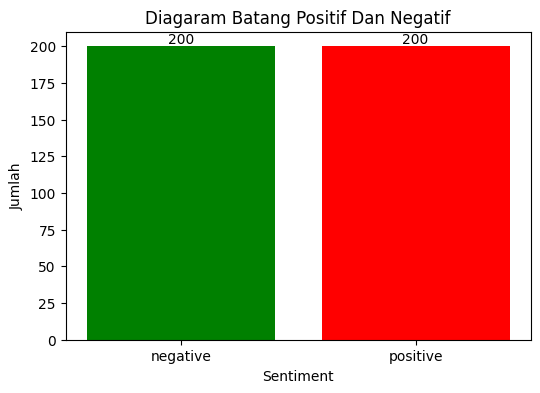

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
counts = dataset_df['Sentiment'].value_counts()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index,counts.values,color=['green','red'])
plt.title('Diagaram Batang Positif Dan Negatif')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')

#Optional 
#plt.figure(figsize=(6,4))
#sns.countplot(x=dataset_df['Sentiment'],data=dataset_df)

result = {
    "Sentiment" : dataset_df['Sentiment'].value_counts()
}
df = pd.DataFrame(result)
for name,p in result.items():
    print(f"{name}:{p}")
    
    for index, row in df.iterrows():
     plt.text(index, row.Sentiment , row.Sentiment, ha='center', va='bottom', fontsize=10)




In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Id                            400 non-null    int64 
 1   Sentiment                     400 non-null    object
 2   Instagram Comment Text        400 non-null    object
 3   Clean Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


In [7]:
dataset_df.drop(columns=['Id'],inplace=True)
dataset_df.head()

,Sentiment,Instagram Comment Text,Clean Instagram Comment Text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......,
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",


Cleaning A Text

In [8]:
import re 
from nltk.tokenize import word_tokenize

def cleaning_data(text):
    #0: lower_text
    text = text.lower()
    #1: Ascii
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    #2: Link
    text = re.sub(r'http[s]?\:\/\/.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+',' ', text)
    text = re.sub(r'pic.twitter.com?.[a-zA-Z0-9\.\/\_?=%&#\-\+!]+',' ', text)
    #3: Mention
    text = re.sub(r'\@([\w]+)',' ', text)
    #4: Tagar
    text = re.sub(r'\#([\w]+)',' ', text)
    #5: Simbol
    text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)
    #6: angka
    text = re.sub(r'[0-9]+','', text)
    #7: karakter berulang (example:ayoooo)
    text = re.sub(r'([a-zA-Z])\1\1','\\1', text)
    text = re.sub(r'([a-zA-Z])\1\1','\\1', text)
    #8: Dobble Space >>
    text = re.sub(' +', ' ', text)
    #9: Space Awal Dan Akhir Kalimat
    text = re.sub(r'^[ ]|[ ]$','', text)
  

    return text

    
dataset_df['Clean Instagram Comment Text'] = dataset_df['Instagram Comment Text'].apply(cleaning_data)
dataset_df.head()

,Sentiment,Instagram Comment Text,Clean Instagram Comment Text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubungan nya keguguran ...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibelain balikan hadew...
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket lg duh kok labil bgt...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadew permpuan itu lg sakit jiwa knp harus dia...


Vanish A Slang_Word,STOPWORDS

In [9]:
from maleo.wizard import Wizard
# Maleo(Slang) -> Formal 
wiz = Wizard()
dataset_df["Normalized_Text"] = wiz.slang_to_formal(dataset_df["Clean Instagram Comment Text"])
dataset_df.head()


C:\Users\mayob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\maleo\cleansing\_cleansing.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,Sentiment,Instagram Comment Text,Clean Instagram Comment Text,Normalized_Text
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubungan nya keguguran ...,username tolol enggak ada hubungan nya kegugur...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tata cowo bgt dibelain balikan hadew...,geblek kamu tata cowok banget dibelain balikan...
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket lg duh kok labil bgt...,kemarin termewek sekarang lengket lagi duh kok...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...,intinya kalau kesel dengan att nya enggak usah...
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadew permpuan itu lg sakit jiwa knp harus dia...,hadew permpuan itu lagi sakit jiwa kenapa haru...


In [10]:
#STOPWORD
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
dataset_df['StopWords'] = dataset_df['Normalized_Text'].apply(lambda t: " ".join([word for word in t.split() if word not in stopwords]))
dataset_df['Final'] = dataset_df['StopWords']
dataset_df['Final'].head(21)

0     username tolol enggak hubungan nya keguguran p...
1     geblek kamu tata cowok banget dibelain balikan...
2     kemarin termewek sekarang lengket duh kok labi...
3     intinya kalau kesel att nya enggak usah anakny...
4     hadew permpuan sakit jiwa jadi peran utama fil...
5     pantesan tinggalkan laki lakinya mikir kali ka...
6     kebiasaan balajaer menyampah ig artis suka pun...
7     sebagian besar rakyat indonesia bodoh membedak...
8       ayu janda bodoh punya suami kapan nikah laginya
9     anyienng suaranya hancur banget lebih merdu tu...
10    syarat sah nikah agama islam adanya cpp adanya...
11    cewek enggak tau diri nih merebut pacar orang ...
12    username eh situ siapa kids jaman sekarang keb...
13                       jijik lihatnya suer deh mincee
14    memang bukan tabu ciuman iya memang membuat en...
15    jadi masalah disini ciuman depan orang banyak ...
16    anjing nya ngamuk hidup kok punya musuh keliha...
17    username ah katanya jaga ucapan lah ucapan

In [11]:
dataset_df.to_csv("cleaned_cyberbullying_dataset.csv", index=False)


Labelling


In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_label = lb.fit_transform(dataset_df['Sentiment'])
df_ylabel = pd.DataFrame(y_label).head() 


In [13]:
#Split_Data
from sklearn.model_selection import train_test_split
X = dataset_df['Final']
#X_2d = X.values.reshape(-1,1)
y = dataset_df['Sentiment']
# Membagi set data latih dan data uji dengan rasio 80:30
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape



(320,)

In [14]:

print(X_train.size, X_train.size/(X_test.size+  X_train.size),'%','\n',
      X_test.size, X_test.size/(X_test.size+ X_train.size),'%')

320 0.8 % 
 80 0.2 %


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=5000)
X_train_tfid = tf.fit_transform(X_train)
X_test_tfid = tf.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogisticRegression" : LogisticRegression(max_iter=5000),
    "LinearSVC" : LinearSVC(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "MultinomialNB" : MultinomialNB(),
  
}

In [17]:
from sklearn.metrics import accuracy_score ,  classification_report 
result_model = {}

for name,model in models.items():
    model.fit(X_train_tfid,y_train)
    y_pred = model.predict(X_test_tfid)
    acc = accuracy_score(y_pred,y_test) * 100
    print(f"{name}:{acc:.2f}")
    result_model[name] = acc

LogisticRegression:95.00
LinearSVC:93.75
RandomForestClassifier:86.25
MultinomialNB:92.50


In [18]:
vector_plot = {
    "Accuracy" : result_model
}
df = pd.DataFrame(vector_plot)
df


,Accuracy
LogisticRegression,95.00
LinearSVC,93.75
RandomForestClassifier,86.25
MultinomialNB,92.50


(array([0, 1, 2, 3]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'LinearSVC'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'MultinomialNB')])

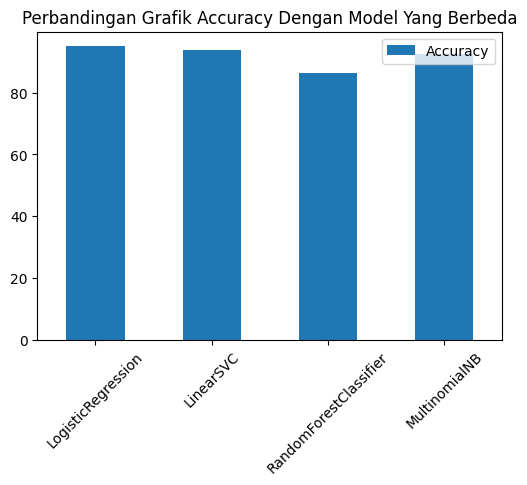

In [19]:
df.plot(kind="bar",figsize=(6,4))
plt.title("Perbandingan Grafik Accuracy Dengan Model Yang Berbeda")
plt.xticks(rotation=45)

In [20]:
positive_texts = dataset_df[dataset_df['Sentiment'] == 'positive']['Final']
negative_texts = dataset_df[dataset_df['Sentiment'] == 'negative']['Final']

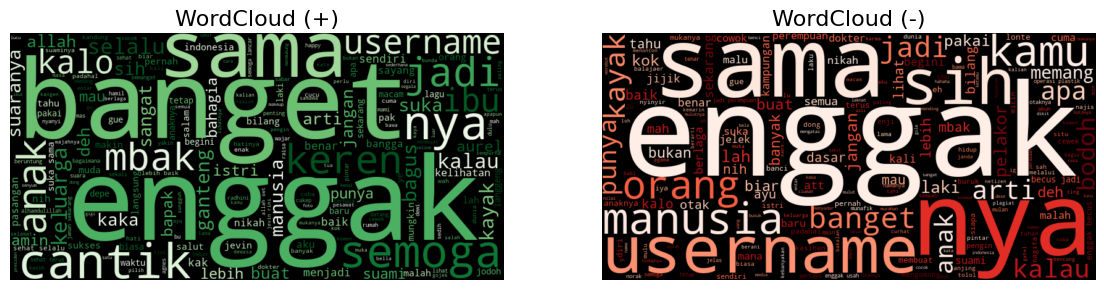

In [21]:
from wordcloud import WordCloud
positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)


wc_positive = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text)
wc_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Tampilkan
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(wc_positive, interpolation='bilinear')
plt.title("WordCloud (+)", fontsize=16)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_negative, interpolation='bilinear')
plt.title("WordCloud (-)", fontsize=16)
plt.axis('off')

plt.show()

-=-=-=- LogisticRegression -=-=-=-
Accuracy:95.0
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      1.00      0.95        40
    positive       1.00      0.90      0.95        40

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



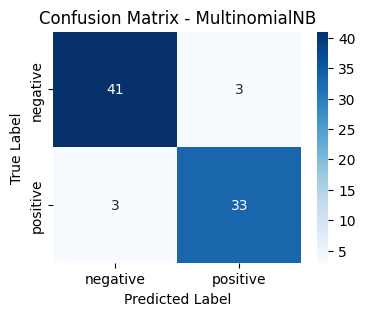

-=-=-=- LinearSVC -=-=-=-
Accuracy:93.75
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.95      0.94        43
    positive       0.94      0.92      0.93        37

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80



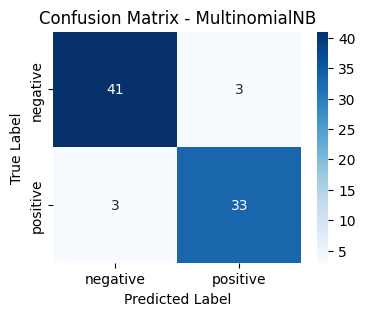

-=-=-=- RandomForestClassifier -=-=-=-
Accuracy:86.25
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.95      0.86        37
    positive       0.94      0.79      0.86        43

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.88      0.86      0.86        80



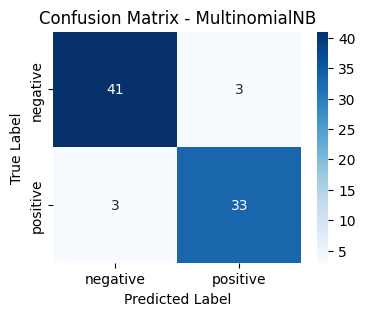

-=-=-=- MultinomialNB -=-=-=-
Accuracy:92.5
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.93      0.93        44
    positive       0.92      0.92      0.92        36

    accuracy                           0.93        80
   macro avg       0.92      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



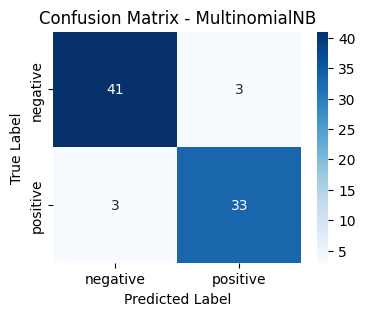

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

result_models = {}
for name_,model_ in models.items():
    model_.fit(X_train_tfid,y_train)
    y_preds = model_.predict(X_test_tfid)
    acc_ = accuracy_score(y_preds,y_test) * 100
    result_models[name_] = acc_ 
    
    print(f"-=-=-=- {name_} -=-=-=-")
    print(f"Accuracy:{acc_}")
    print(f"Classification Report:\n{classification_report(y_preds,y_test)}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [23]:
tfidf = TfidfVectorizer(ngram_range=(3, 3), max_features=1000)
tfidf_matrix = tfidf.fit_transform(dataset_df['Final'])
feature_names = tfidf.get_feature_names_out()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\mayob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
C:\Users\mayob\AppData\Local\Temp\ipykernel_17904\3843432971.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette="viridis")


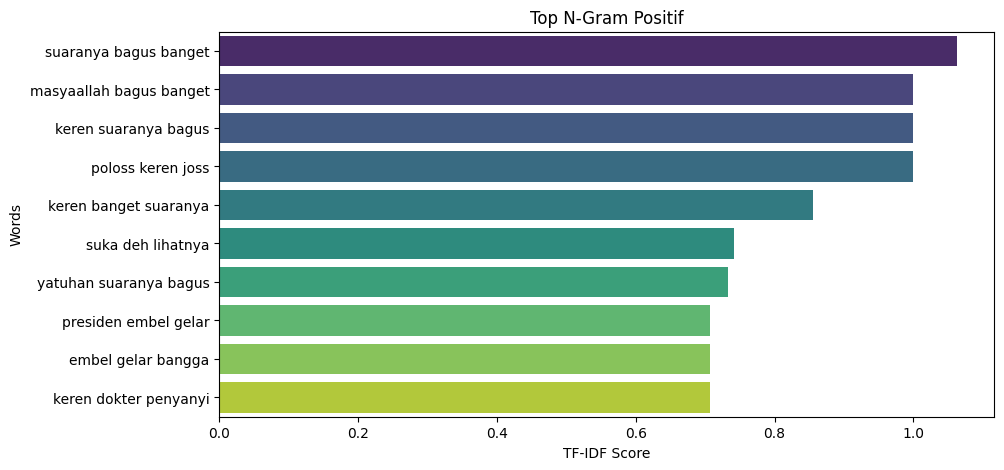

C:\Users\mayob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(
C:\Users\mayob\AppData\Local\Temp\ipykernel_17904\3843432971.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette="viridis")


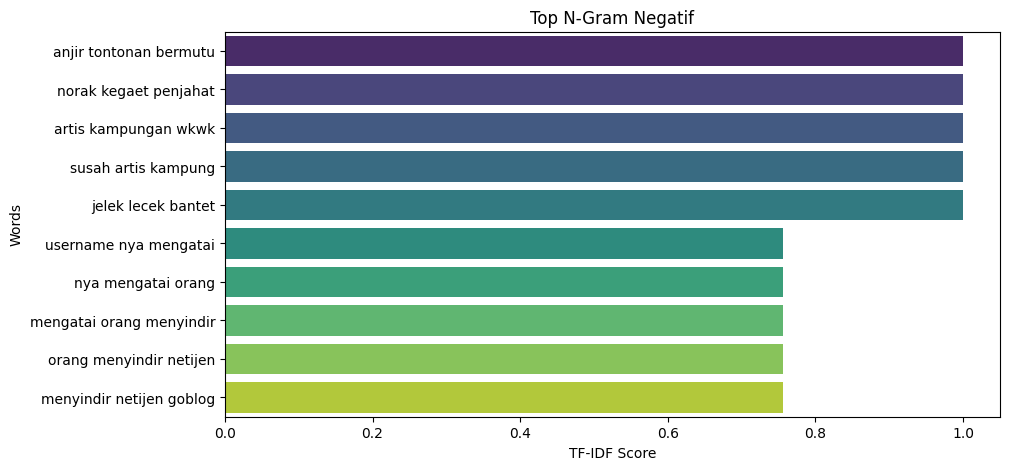

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('stopwords')
indo_stopwords = stopwords.words('indonesian')

def plot_top_ngrams(corpus, n=20, ngram_range=(1,1), title="Top Words"):

    vec = TfidfVectorizer(ngram_range=ngram_range, stop_words=indo_stopwords).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    
    words = [w[0] for w in words_freq]
    freqs = [w[1] for w in words_freq]
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=freqs, y=words, palette="viridis")
    plt.title(title)
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()
    


plot_top_ngrams(positive_texts, n=10, ngram_range=(3,3), title="Top N-Gram Positif")
plot_top_ngrams(negative_texts, n=10, ngram_range=(3,3), title="Top N-Gram Negatif")


In [25]:
sample = ["muka lu kayak monyet"]
testing_data = tf.transform(sample)
prediction = model.predict(testing_data)

print("Prediksi:",["Positif" if prediction[0].lower() == "positive" else "Negatif"])
prediction[0]



Prediksi: ['Negatif']


'negative'